In [2]:

import fastbook
fastbook.setup_book()
from fastbook import *

from fastai.vision.widgets import *
from fastai.imports import *

/opt/anaconda3/envs/fastai/lib/python3.8/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [3]:
card_types = "adhar", "pan"
path = Path("card_types")

In [16]:
cards = DataBlock(
blocks = (ImageBlock, CategoryBlock),
get_items = get_image_files,
splitter = RandomSplitter(valid_pct = 0.2,seed = 42),
get_y = parent_label,
item_tfms = Resize(128))

In [17]:
dls = cards.dataloaders(path)

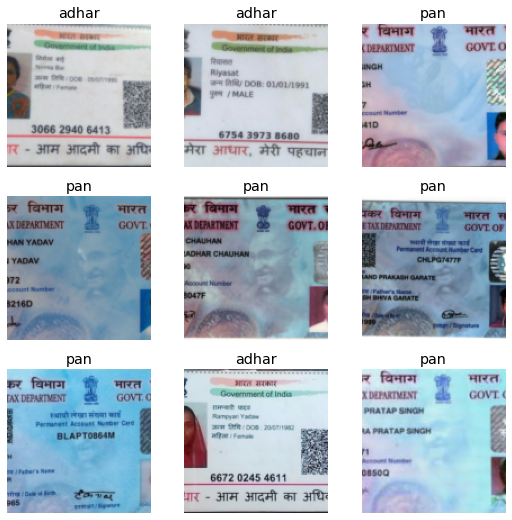

In [21]:
dls.valid.show_batch()

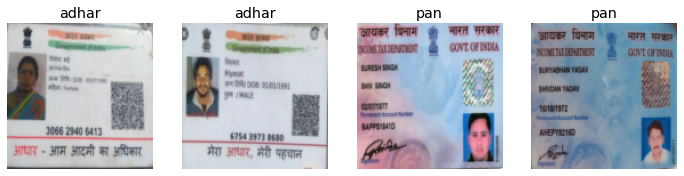

In [27]:
cards = cards.new(item_tfms =Resize(128,ResizeMethod.Squish))
dls = cards.dataloaders(path)
dls.valid.show_batch(max_n = 4, nrows = 1)


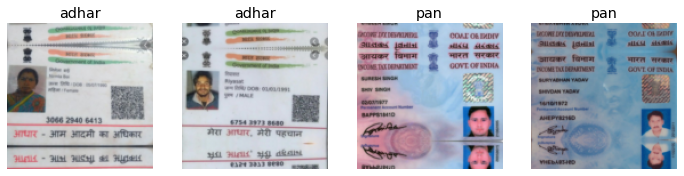

In [29]:
cards = cards.new(item_tfms = Resize(128, ResizeMethod.Pad))
dls = cards.dataloaders(path)
dls.valid.show_batch(max_n = 4, nrows =1)

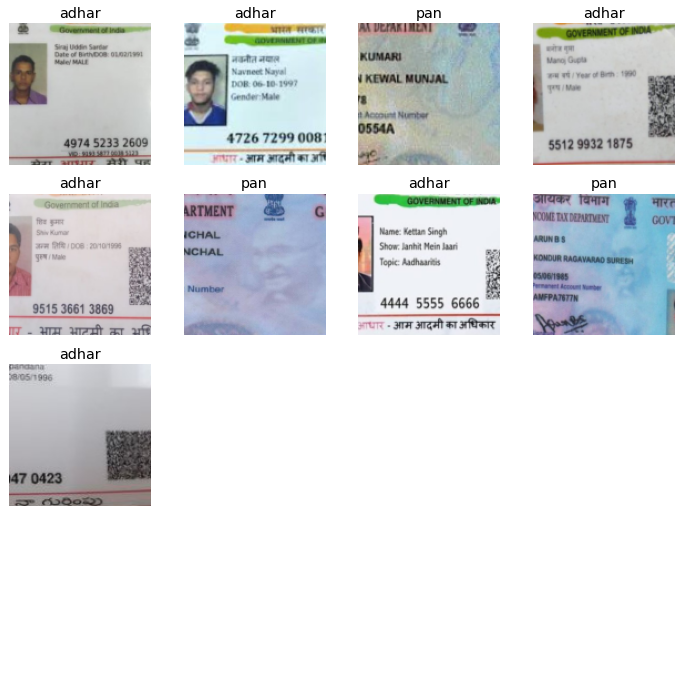

In [40]:
cards = cards.new(item_tfms = RandomResizedCrop(128, min_scale = 0.3))
dls = cards.dataloaders(path, bs = 10)
dls.train.show_batch(ncols =4, nrows = 4)


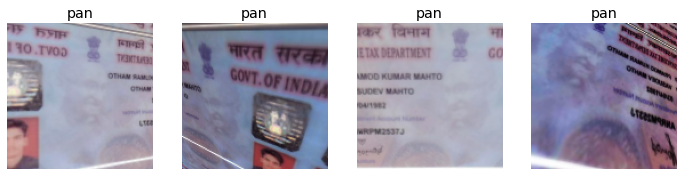

In [45]:
cards = cards.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 2))
dls = cards.dataloaders(path, bs = 10)
dls.train.show_batch(nrows = 1, ncols = 4, unique = True)

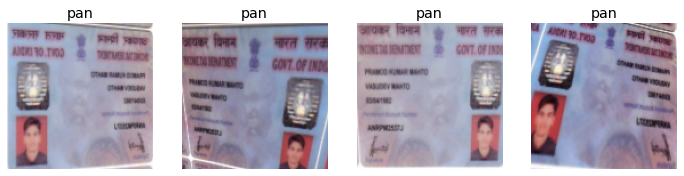

In [46]:
cards = cards.new(item_tfms = Resize(128, ResizeMethod.Squish), batch_tfms = aug_transforms())
dls = cards.dataloaders(path, bs = 10)
dls.train.show_batch(nrows = 1, ncols = 4, unique = True)

In [53]:
learn_inf = load_learner("export.pkl")

In [54]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [55]:
img = PILImage.create(btn_upload.data[-1])

In [57]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [56]:
learn_inf.predict(img)

('adhar', tensor(0), tensor([9.9995e-01, 4.7689e-05]))

In [58]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 2.5 MB 779 kB/s eta 0:00:01
     |████████████████████████████████| 374 kB 7.2 MB/s eta 0:00:01
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached nbclient-0.5.3-py3-none-any.whl (82 kB)
  Using cached jupyter_client-6.1.12-py3-none-any.whl (112 kB)
  Using cached tornado-6.1-cp39-cp39-macosx_10_9_x86_64.whl (416 kB)
  Using cached traitlets-5.0.5-py3-none-any.whl (100 kB)
  Using cached jupyter_core-4.7.1-py3-none-any.whl (82 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached pyzmq-22.0.3-cp39-cp39-macosx_10_15_universal2.whl (1.9 MB)
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
     |████████████████████████████████| 65 kB 5.2 MB/s  eta 0:00:01
  Using cached prometheus_client-0.9.0-py2.py3-none-any.whl (53 kB)
  Using cached terminado-0.9.4-py3-none-any.whl (14 kB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl (125 kB)
  Using cached argon2_cffi-20.1.0-cp37-abi3-